**Problem Statement:**
In the telecom sector, where customers choose from various providers for communication and internet services, the challenge lies in retaining them. Service quality significantly influences customer perception, with even a brief maintenance break causing anxiety, highlighting our often-overlooked reliance on these services. Coupled with high customer acquisition costs, analyzing churn becomes critical. Churn rate, reflecting customer subscription cancellations, directly impacts revenue. Insights from churn analysis guide companies in formulating targeted strategies, improving service quality, and cultivating customer trust. Building predictive models and generating comprehensive churn analysis reports are imperative for sustained business growth.

## Dataset Attributes

The dataset encompasses diverse attributes providing valuable insights into customer details and interactions. Customer-specific details include a unique identifier (**customerID**), gender information, and a binary indicator denoting whether the customer is a senior citizen (**SeniorCitizen**).

Additional attributes capture relational aspects, such as whether the customer has a partner (**Partner**) and dependents (**Dependents**). The **tenure** attribute signifies the duration, in months, for which the customer has been associated with the company.

Communication services are represented by attributes like **PhoneService** and **MultipleLines**, indicating the presence of phone service and whether the customer has multiple lines. Internet-related features encompass the **InternetService** provider, online security (**OnlineSecurity**), online backup (**OnlineBackup**), device protection (**DeviceProtection**), and tech support (**TechSupport**).

Entertainment services are reflected in attributes like streaming TV (**StreamingTV**) and streaming movies (**StreamingMovies**). The **Contract** attribute reveals the duration of the customer's contract, with options such as month-to-month, one year, and two years.

Billing preferences are outlined through the **PaperlessBilling** attribute, indicating whether the customer opts for paperless billing. The **PaymentMethod** attribute specifies how customers choose to pay, with options like electronic check, mailed check, bank transfer (automatic), and credit card (automatic).

Financial details include the **MonthlyCharges** the customer incurs on a monthly basis and the overall **TotalCharges** accumulated.

Lastly, the critical attribute of **Churn** denotes whether the customer has churned, serving as a crucial factor in understanding customer retention dynamics.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [130]:
data = pd.read_csv('Telecom-data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [132]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [133]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present in the data!

In [134]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


The dataset exhibits numerous features with text data, most likely representing categorical features. Notably, the **Total Charges** feature contains numerical values but is currently stored as a string datatype. As a first step, we will convert the entries in this column into floating-point numbers.

In [135]:
non_convertible_values = data[data['TotalCharges'] == ' ']['TotalCharges']
print("Non-convertible values:", non_convertible_values.unique())

data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

data['TotalCharges'] = data['TotalCharges'].astype(float)

data = data[data['TotalCharges'] != ' ']

data['TotalCharges'] = data['TotalCharges'].astype(float)

data.drop(columns = ['customerID'], inplace = True)

Non-convertible values: [' ']


During the conversion of the **TotalCharges** column to float, an error was encountered due to the presence of empty strings, preventing the direct conversion of string to float.

The issue arises because, though these elements were defined as strings, they did not appear as null values, and consequently, the missing values did not display anything. An example of this is a string variable defined as `a = ' '`. 

To address this:-

In [136]:
from sklearn.preprocessing import LabelEncoder
from joblib import dump
import pandas as pd

label_encoders = {}

df1 = data.copy(deep=True)

text_data_features = [col for col in data.columns if col not in data.describe().columns]

print('Label Encoder Transformation')

for col in text_data_features:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col]) 
    
    label_encoders[col] = le
    
    print(f"{col} : {df1[col].unique()} = {le.inverse_transform(df1[col].unique())}")

dump(label_encoders, 'models/label_encoders.joblib')
print("\nLabel encoders saved to 'label_encoders.joblib'")

Label Encoder Transformation
gender : [0 1] = ['Female' 'Male']
Partner : [1 0] = ['Yes' 'No']
Dependents : [0 1] = ['No' 'Yes']
PhoneService : [0 1] = ['No' 'Yes']
MultipleLines : [1 0 2] = ['No phone service' 'No' 'Yes']
InternetService : [0 1 2] = ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 2 1] = ['No' 'Yes' 'No internet service']
OnlineBackup : [2 0 1] = ['Yes' 'No' 'No internet service']
DeviceProtection : [0 2 1] = ['No' 'Yes' 'No internet service']
TechSupport : [0 2 1] = ['No' 'Yes' 'No internet service']
StreamingTV : [0 2 1] = ['No' 'Yes' 'No internet service']
StreamingMovies : [0 2 1] = ['No' 'Yes' 'No internet service']
Contract : [0 1 2] = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0] = ['Yes' 'No']
PaymentMethod : [2 3 0 1] = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : [0 1] = ['No' 'Yes']

Label encoders saved to 'label_encoders.joblib'


In [137]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7032.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2283.30,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2266.77,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.45,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1397.47,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3794.74,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


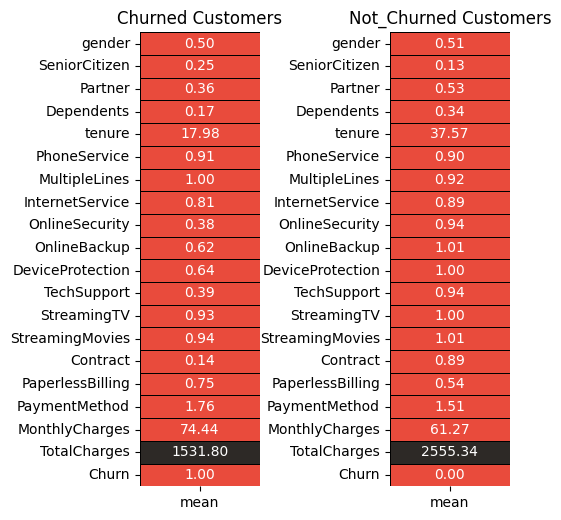

In [138]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)


- **Mean Tenure:** Customers who churned had a lower mean tenure (17.98 months) compared to those who continued (37.57 months).

- **Online Services:** Features like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport have higher mean values for not-churned customers, indicating their potential role in customer retention.

- **Contract Duration:** Churned customer contracts are notably shorter than those of not-churned customers.

- **Monthly Charges:** Mean MonthlyCharges for churned customers (74.44) are higher than for not-churned customers (61.27).

- **Total Charges:** Not-churned customers have higher mean TotalCharges (2555.34) compared to churn customers (1531.80).

- **Categorical Features:** Due to numerous categorical features, mean values are concentrated around 0.

# Exploratory Data Analysis (EDA)

In [139]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df1[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


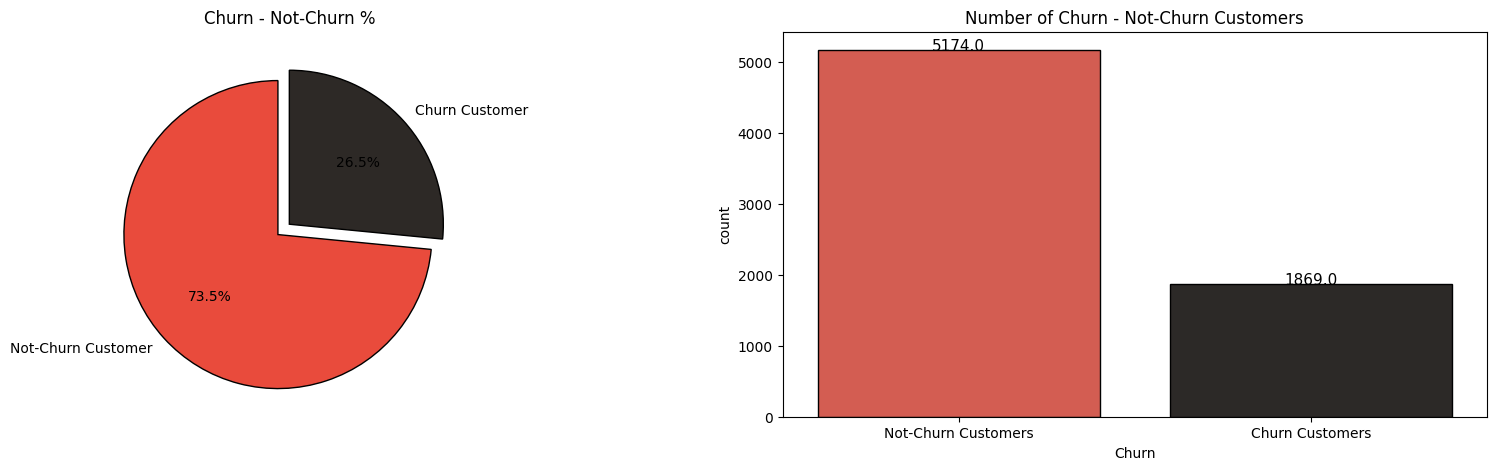

In [140]:
colors = ['#E94B3C','#2D2926']

l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie chart
axes[0].pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
            colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Churn - Not-Churn %')

# Countplot
ax = sns.countplot(x='Churn', data=df1, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

ax.set_title('Number of Churn - Not-Churn Customers')

plt.show()


## Categorical Features and Their Impact on the Target Variable (Churn)

In [141]:
categorical_features.remove('Churn')


In [142]:
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

## Group 1: Customer-Enlisted Services

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**


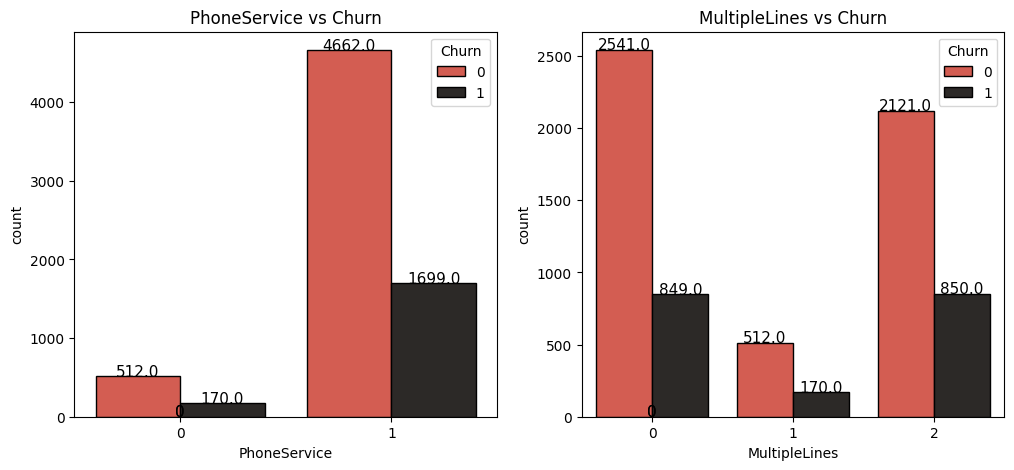

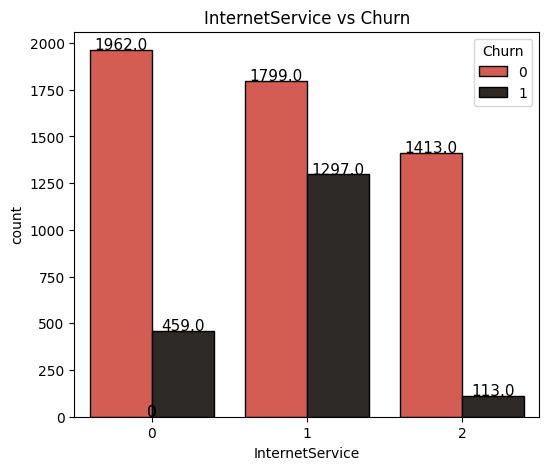

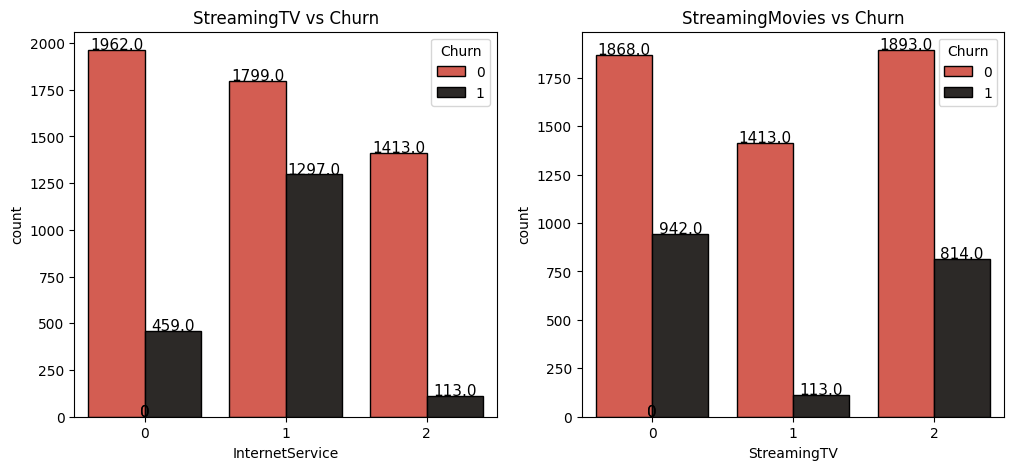

In [143]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x=l2[2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i + 2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title)

- **PhoneService Analysis:**
  Notably, a higher retention rate is observed among customers with no phone service compared to those who opted to discontinue the service.

- **MultipleLines Impact:**
  The churn rate appears consistent irrespective of whether customers have subscribed to multiple lines or not.

- **InternetService Preferences:**
  A considerable number of customers exhibit a preference against utilizing Fiber optic cables for InternetService. Conversely, the data suggests a greater inclination towards DSL among customers.

- **Insights on Streaming Services:**
  Both StreamingTV and StreamingMovies exhibit parallel churn patterns. Regardless of subscription status, a noteworthy number of customers have experienced churn. This implies that factors beyond streaming content alone contribute to customer disengagement.


### Group 1: Customer-Enlisted Services

- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**


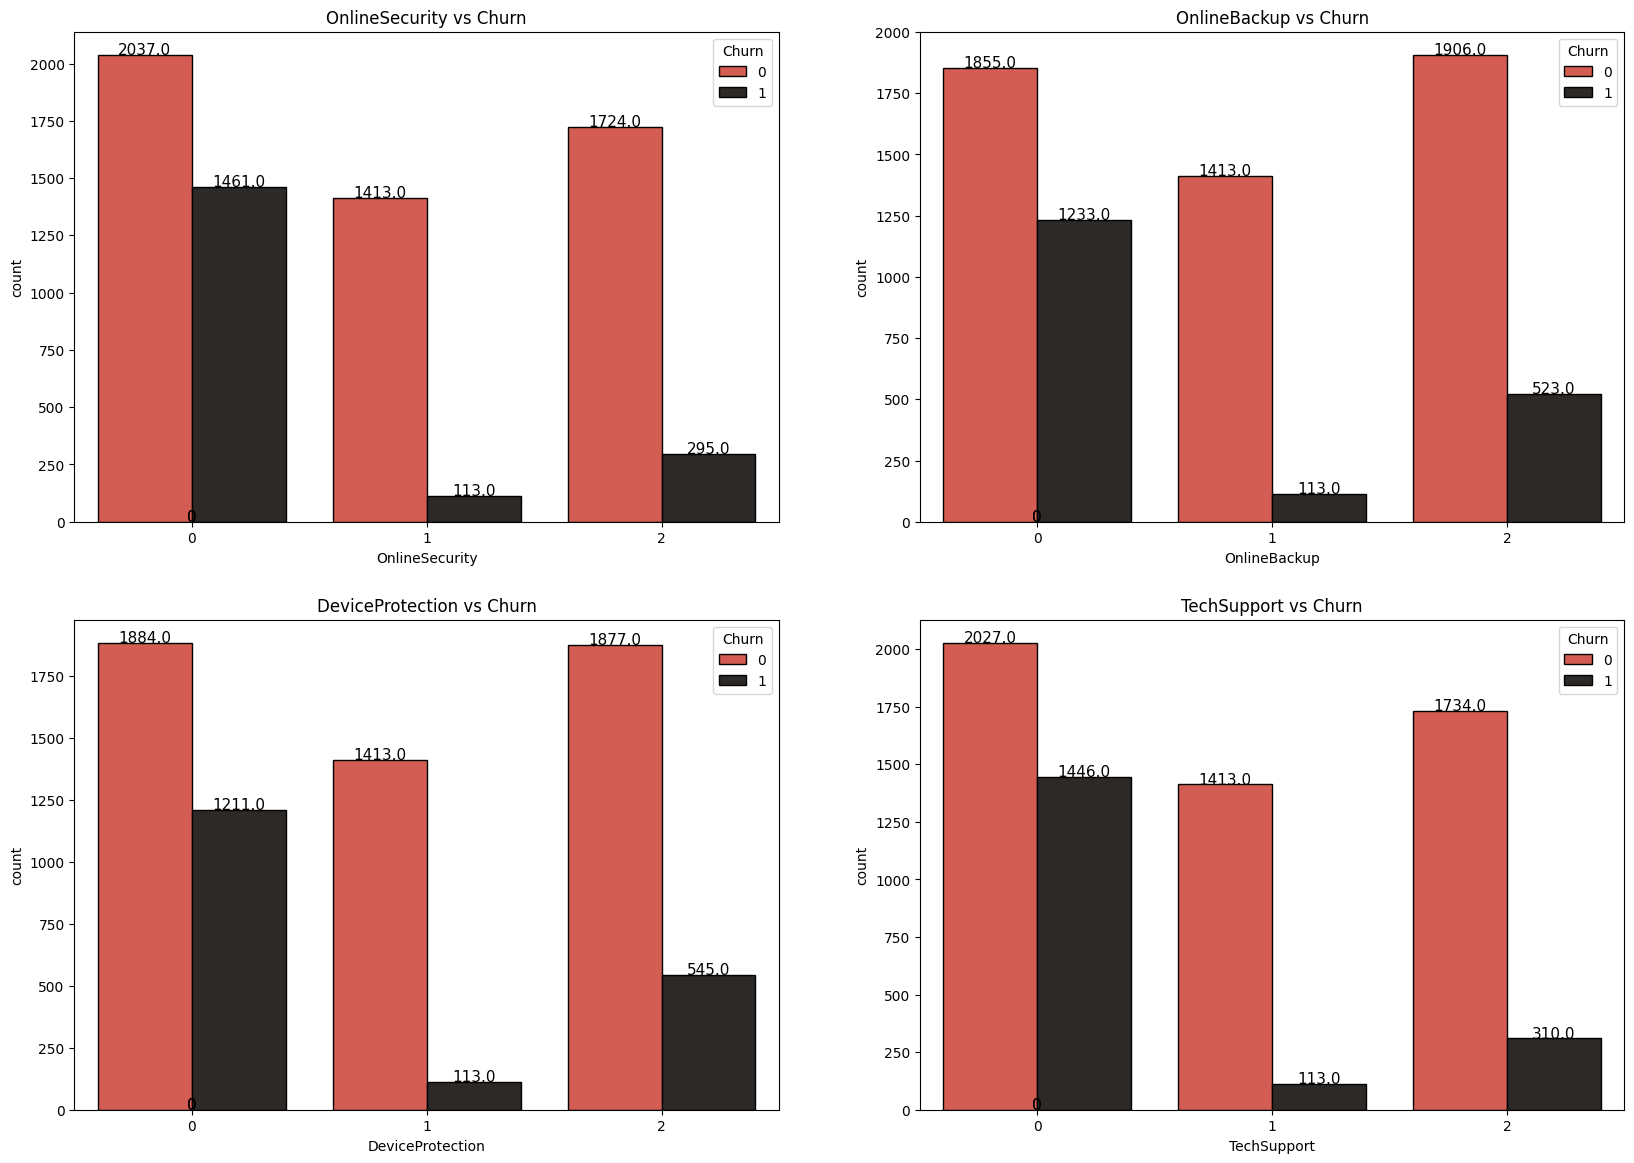

In [144]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x=l2[-4 + i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

### Group 2

- **Contract**
- **PaperlessBilling**
- **PaymentMethod**


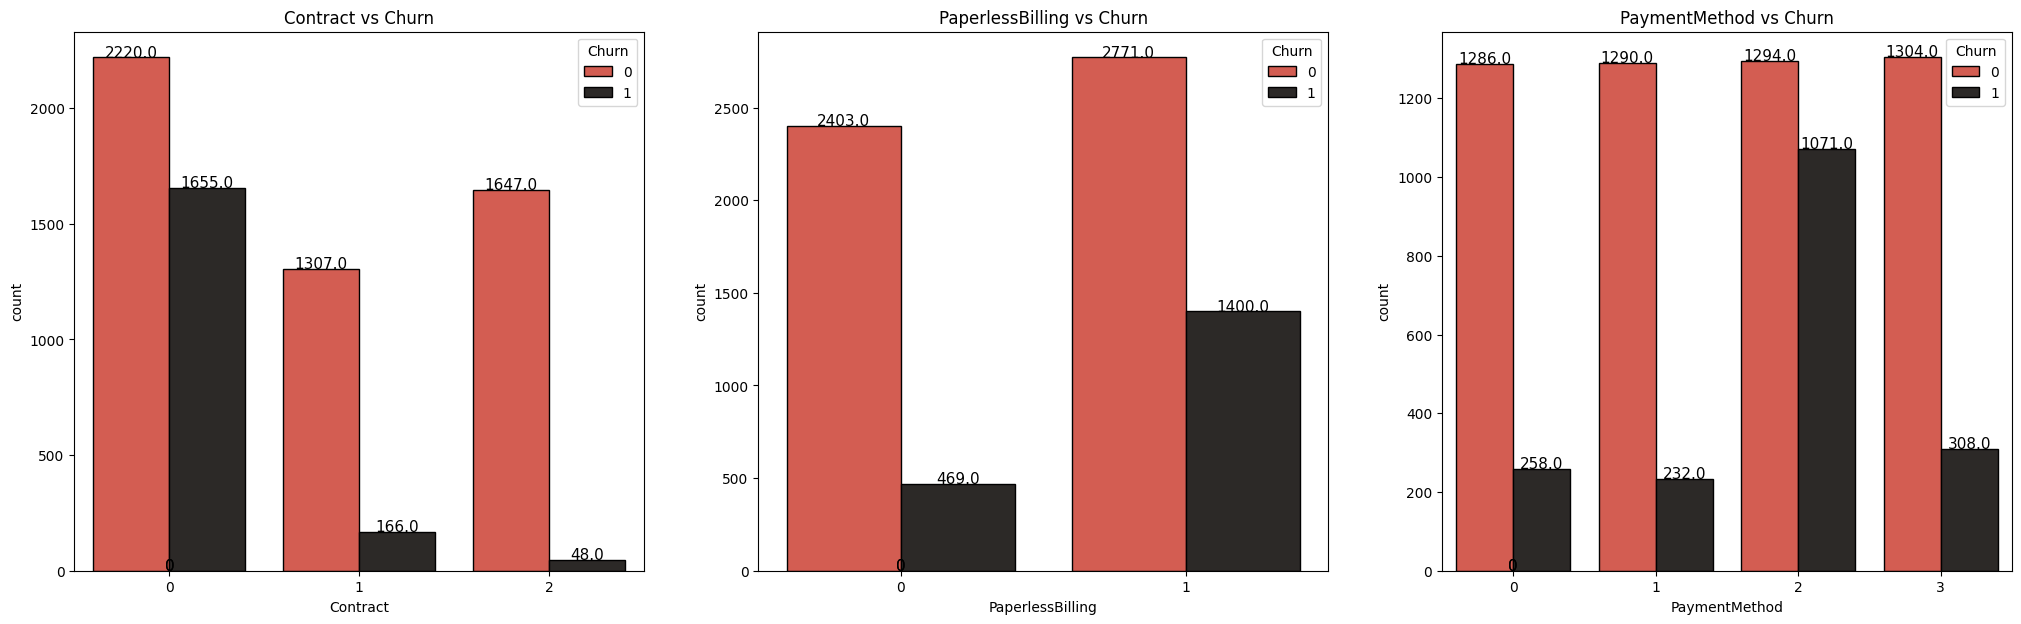

In [145]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=l3[0],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x=l3[1],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x=l3[2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
     ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

- **Contract Analysis:**
  Customer churn is notably high for Month-to-Month contracts. This could be attributed to customers testing various services and opting for shorter-term commitments to explore available options or save costs.

- **PaperlessBilling Impact:**
  A considerable number of customers experience churn in the presence of PaperlessBilling, suggesting potential issues related to payment or receipt processes.

- **PaymentMethod Insights:**
  Customers exhibit a strong aversion to the Electronic check payment method. Of the 2365 bills paid using Electronic check, a significant 1071 customers chose to discontinue services. Addressing issues with Electronic check or reconsidering its inclusion may be necessary for improved customer satisfaction.


## Numerical Features Distribution


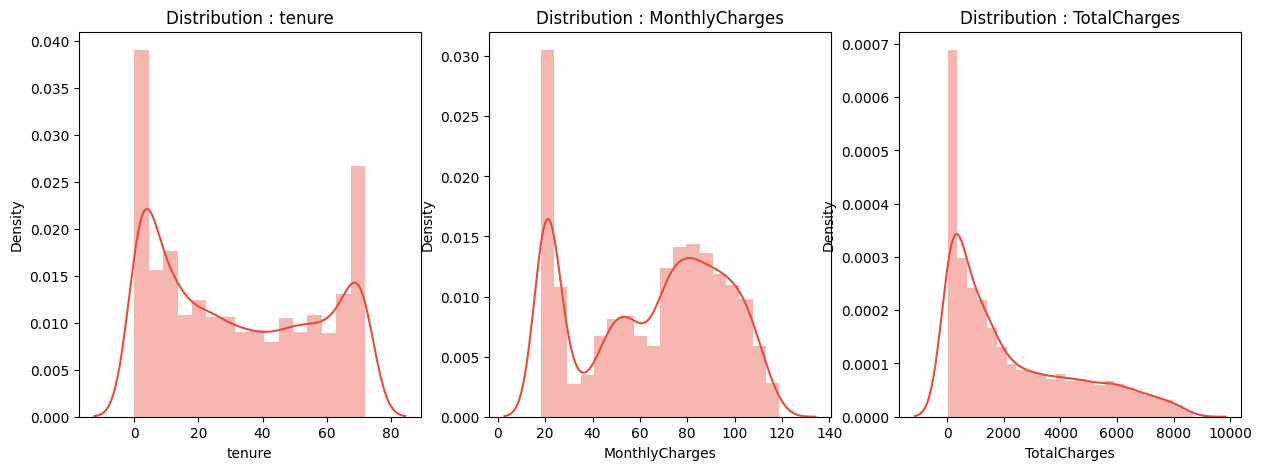

In [146]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- **Tenure Distribution:**
  The tenure distribution exhibits a bimodal pattern with peaks at 0-70, indicating the presence of two distinct groups within the customer base.

- **MonthlyCharges Distribution:**
  MonthlyCharges create a bimodal distribution with peaks at 20-80, suggesting the existence of two prevalent cost structures or service tiers.

- **TotalCharges Distribution:**
  TotalCharges displays a positively or rightly skewed distribution, indicating a concentration of lower values with a gradual tapering towards higher values.



## Target Variable (Outcome) in Relation to Numerical Features

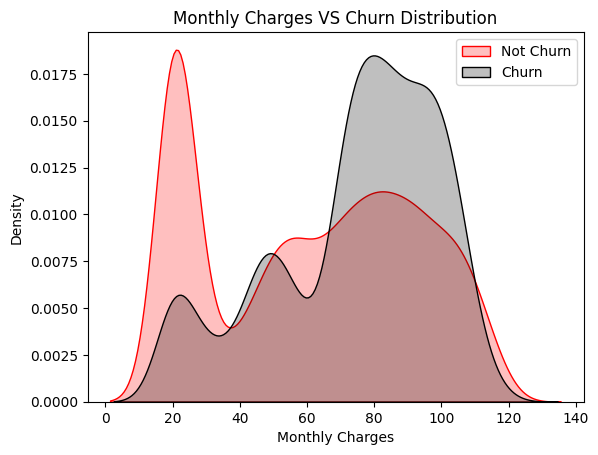

In [147]:
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1) ],
                ax =ax, color="Black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution');

Customers are more likely to churn due to the presence of high monthly charges.

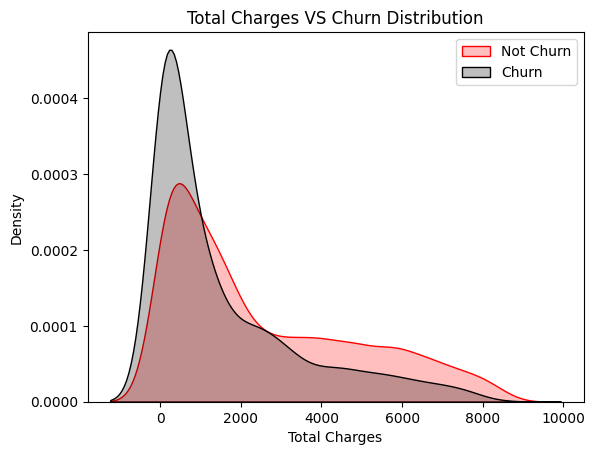

In [148]:
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 0) ],
                color="red", shade = True);
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1) ],
                ax =ax, color="black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

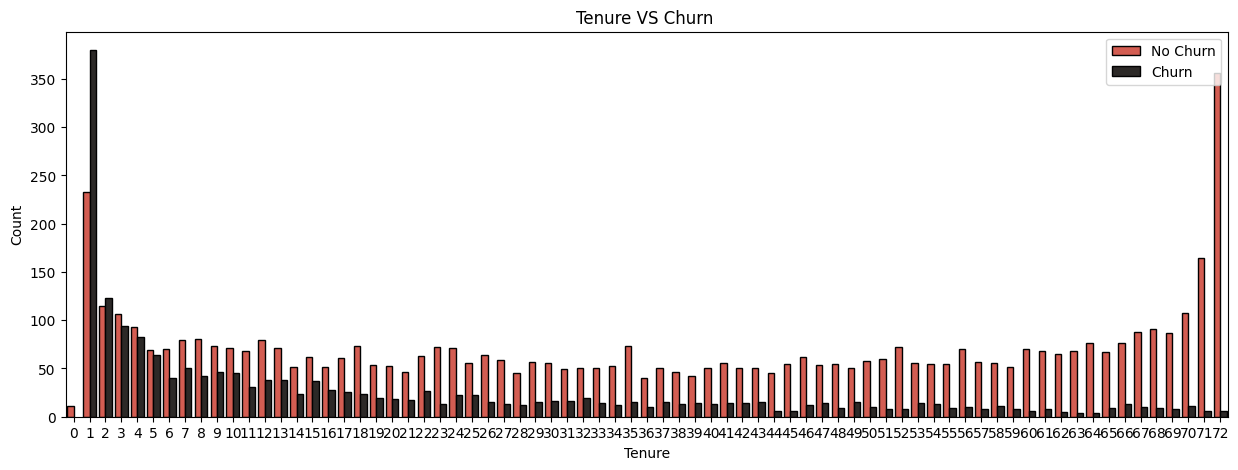

In [149]:
plt.figure(figsize = (15,5))
sns.countplot(x='tenure', data=df1, hue='Churn', palette = colors, edgecolor='black')
plt.title('Tenure VS Churn ')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.show()

In [150]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer

In [151]:
# Addressing Data Imbalance with SMOTE:
cols = list(df1.columns)
cols.remove('Churn')

x = df1.loc[:,cols]
y = df1.loc[:,'Churn']


imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

over = SMOTE(sampling_strategy = 1)

x1,y1 = over.fit_resample(x,y)
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y1))



Class distribution before SMOTE: Counter({0: 5174, 1: 1869})
Class distribution after SMOTE: Counter({0: 5174, 1: 5174})


In [152]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 2)


In [153]:
x_train_df = pd.DataFrame(x_train, columns=cols)
y_train_df = pd.DataFrame({'Churn': y_train})
x_train_test = pd.concat([x_train_df, y_train_df], axis=1)

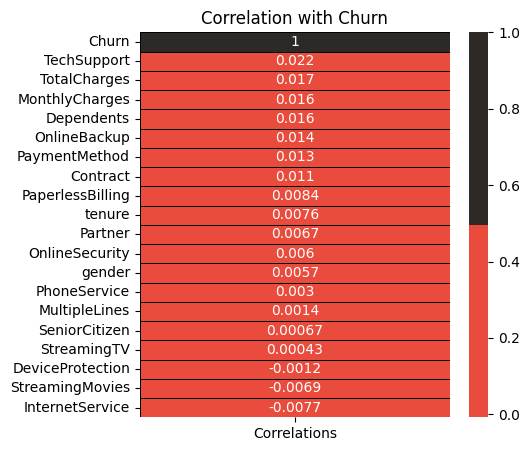

In [154]:
corr = x_train_test.corr()['Churn'].sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')
plt.title('Correlation with Churn')
plt.show()

# Categorical Feature Selection Strategy:

In [155]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

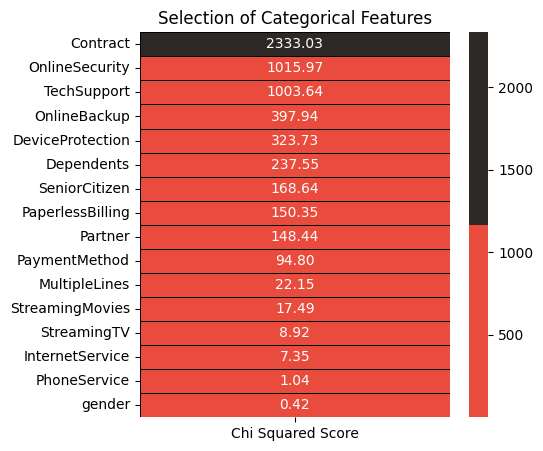

In [156]:
features = x_train_df.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Following a thorough analysis,we can infer that the categorical features "PhoneService," "gender," "StreamingTV," "StreamingMovies," "MultipleLines," and "InternetService" demonstrate a notably low association with the target variable "Churn."


In [157]:
x_train=x_train_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'])
x_test_df = pd.DataFrame(x_test, columns=cols)
x_test=x_test_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'])


In [158]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()  
ss = StandardScaler() 

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

x_train[columns_to_scale] = mms.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = mms.transform(x_test[columns_to_scale])

In [159]:
dump(mms, 'models/minmax_scaler.joblib') 
dump(ss, 'models/standard_scaler.joblib') 

['models/standard_scaler.joblib']

## Feature Selection & Data Splitting for Modeling:

In [160]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve



Utilizing selected features identified through tests, split the data into 80-20 train-test sets. Train the model on the training set and evaluate its performance on the test set. This ensures a robust and effective machine learning model.

In [161]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    
    accuracy =classifier.score(x_test,y_test)
    print("Accuracy is :",accuracy)
    
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

    

def model_evaluation(classifier,x_test,y_test):
    # Confusion Matrix
    plt.figure(figsize=(4,3))
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    
    print(classification_report(y_test,classifier.predict(x_test)))

## Xgboost Classifier :


Accuracy is : 0.8594202898550725
Cross Validation Score :  93.89%
ROC_AUC Score :  85.94%
--------------------------------------------------------------------------------


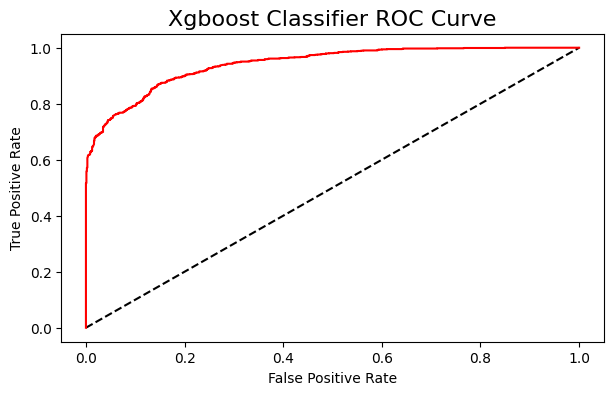

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1040
           1       0.86      0.86      0.86      1030

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



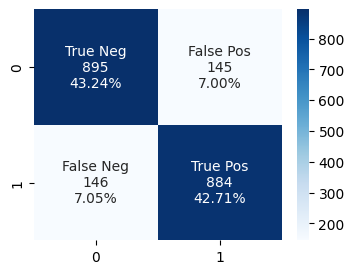

In [162]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Xgboost Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xgboost Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_xgb,x_test,y_test)

## Random Forest Classifier :


Accuracy is : 0.8130434782608695
Cross Validation Score :  90.02%
ROC_AUC Score :  81.33%
--------------------------------------------------------------------------------


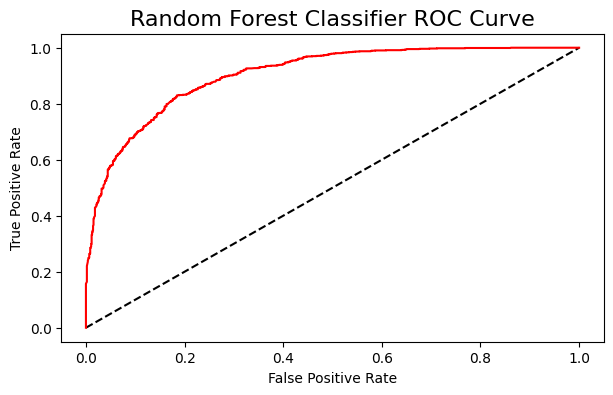

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1040
           1       0.78      0.87      0.82      1030

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



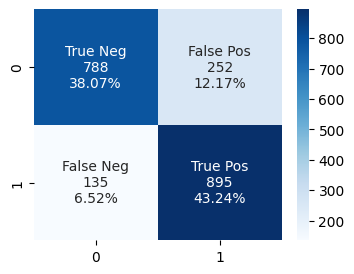

In [163]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_rf,x_test,y_test)

## Decision Tree Classifier :


Accuracy is : 0.8004830917874396
Cross Validation Score :  85.93%
ROC_AUC Score :  80.04%
--------------------------------------------------------------------------------


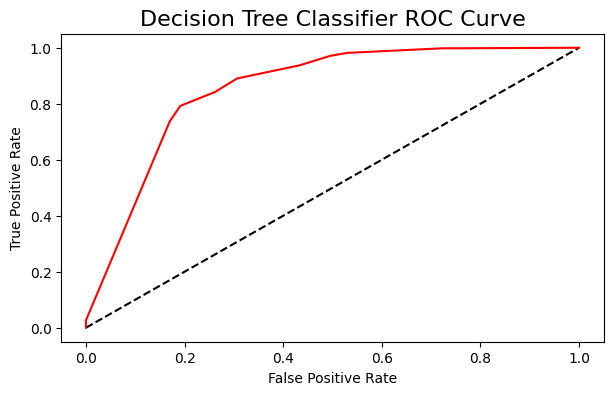

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1040
           1       0.80      0.79      0.80      1030

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



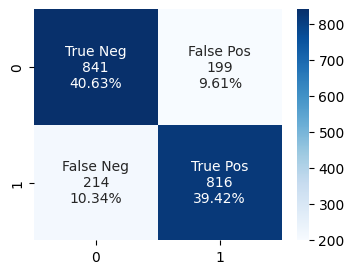

In [164]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_dt.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_dt,x_test,y_test)

## Logistic Regression Classifier


Accuracy is : 0.7729468599033816
Cross Validation Score :  84.82%
ROC_AUC Score :  77.32%
--------------------------------------------------------------------------------


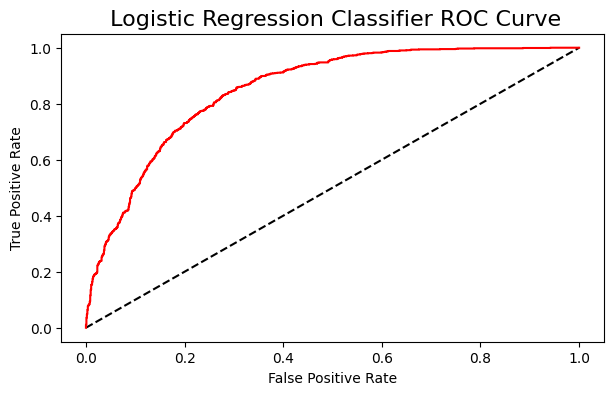

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1040
           1       0.75      0.82      0.78      1030

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070



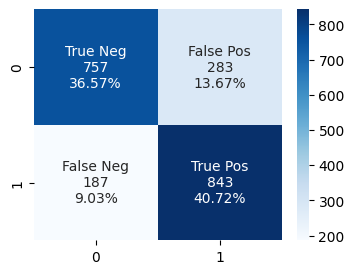

In [165]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

model(classifier_lr,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_lr,x_test,y_test)

# Algorithm Results Table


In [166]:
data = {
    'ML Algorithm': ['XGBClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegressionClassifier'],
    'Accuracy': [85.70, 81.01, 79.46, 77.43],
    'Cross Validation Score': [93.84, 89.91, 86.07, 84.70],
    'ROC AUC Score': [85.70, 81.04, 79.48, 77.46],
    'F1 Score (Churn)': [86, 82, 80, 78]
}

results_df = pd.DataFrame(data)
results_df


,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score,F1 Score (Churn)
0,XGBClassifier,85.70,93.84,85.70,86
1,RandomForestClassifier,81.01,89.91,81.04,82
2,DecisionTreeClassifier,79.46,86.07,79.48,80
3,LogisticRegressionClassifier,77.43,84.70,77.46,78


In [167]:
from joblib import dump

dump(classifier_xgb, 'models/xgboost_classifier.joblib')
dump(classifier_rf, 'models/random_forest_classifier.joblib')


['models/random_forest_classifier.joblib']

In [174]:
from sklearn.cluster import KMeans

churned_customers = df1[df1['Churn'] == 1].copy()

columns_to_drop = [
    'Churn',             
    'PhoneService',     
    'gender',           
    'StreamingTV',      
    'StreamingMovies',  
    'MultipleLines',    
    'InternetService',
    'Dependents',       
    'OnlineSecurity',   
    'Partner',          
    'SeniorCitizen',    
    'tenure'  
]

X_train_churn_only = churned_customers.drop(columns=columns_to_drop)

categorical_cols = X_train_churn_only.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_train_churn_only[col] = label_encoders[col].transform(X_train_churn_only[col])

numerical_cols = ['MonthlyCharges', 'TotalCharges']
scalar = MinMaxScaler()
scalar.fit(X_train_churn_only[numerical_cols])
X_train_churn_only[numerical_cols] = scalar.transform(X_train_churn_only[numerical_cols])

cluster_model = KMeans(n_clusters=5, random_state=42)
cluster_model.fit(X_train_churn_only)

dump(cluster_model, 'models/cluster_model.joblib')

['models/cluster_model.joblib']

In [175]:
X_train_churn_only

,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,2,0,0,0,1,3,0.35,0.01
4,0,0,0,0,1,2,0.52,0.02
5,0,2,0,0,1,2,0.81,0.09
8,0,2,2,0,1,2,0.86,0.35
13,2,2,0,0,1,0,0.85,0.58
...,...,...,...,...,...,...,...,...
7021,0,0,2,1,1,2,0.41,0.08
7026,0,0,0,0,1,0,0.25,0.04
7032,0,0,0,0,1,2,0.57,0.01
7034,2,2,0,0,1,1,0.85,0.79


In [170]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1
